<a href="https://colab.research.google.com/github/paruliansaragi/cnn-fastai/blob/master/fastaiMLsgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai==0.7.0
!pip install torchtext==0.2.3

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [0]:
path = 'data/mnist/'

In [0]:
import os
os.makedirs(path, exist_ok=True)

In [0]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [0]:
get_data(URL+FILENAME, path+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(path+FILENAME)

mnist.pkl.gz: 16.2MB [00:03, 4.21MB/s]                            


In [0]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [0]:
'''
Many machine learning algorithms behave better when the data is normalized, 
that is when the mean is 0 and the standard deviation is 1. 
We will subtract off the mean and standard deviation from our training set in 
order to normalize the data:
'''

mean = x.mean()
std = x.std()

x=(x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [0]:
'''
Note that for consistency (with the parameters we learn when training),
we subtract the mean and standard deviation of our training set from our validation set.
'''

x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()

(-0.005850922, 0.99243325)

In [0]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [0]:
x_valid.shape


(10000, 784)

In [0]:
x_imgs = np.reshape(x_valid, (-1,28,28)); x_imgs.shape

(10000, 28, 28)

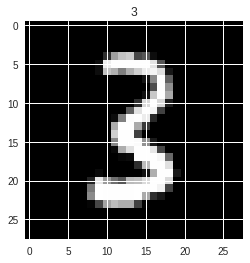

In [0]:
show(x_imgs[0], y_valid[0])

In [0]:
y_valid.shape, y_valid[0]

((10000,), 3)

In [0]:
x_imgs[0,10:15,10:15]

array([[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
       [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
       [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
       [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
       [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]], dtype=float32)

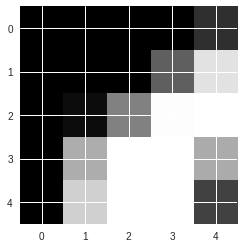

In [0]:
show(x_imgs[0,10:15,10:15])

In [0]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

In [0]:
net = nn.Sequential(
    nn.Linear(28*28, 100),#28x28 input pixels
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),#10 output classes
    nn.LogSoftmax()
).cuda()

In [0]:
md = ImageClassifierData.from_arrays(path, (x,y), (x_valid, y_valid))

In [0]:
loss = nn.NLLLoss()
metrics=[accuracy]
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)
'''
The loss associated with one example in binary classification is given by: 
-(y * log(p) + (1-y) * log (1-p)) where y is the true label of x and p is 
the probability predicted by our model that the label is 1.
'''

In [0]:
def binary_loss(y, p):
  return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))
#if y is 0 then -np.log(probability)
#else then -np.log(1-probability)

In [0]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9999, 0.0001, 0.00001, 0.999])
binary_loss(acts, preds)

0.0003026275960626292

In [0]:
bl = -(np.log(0.9))
bl2 = -(np.log(1-0.9))
bl, bl2

(0.10536051565782628, 2.302585092994046)

In [0]:
#Fitting is the process by which the neural net learns the best parameters for the dataset.
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.255265   0.307683   0.9141    
    1      0.226696   0.207078   0.9438    
    2      0.21991    0.193045   0.9443    
    3      0.20209    0.183521   0.9529    
    4      0.213863   0.187712   0.9478    



[array([0.18771]), 0.9478]

In [0]:
set_lrs(opt, 1e-2)

In [0]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.061718   0.088001   0.9749    
    1      0.057386   0.086295   0.9732    
    2      0.047935   0.076782   0.9776    



[array([0.07678]), 0.9776]

In [0]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.038313   0.075278   0.9771    
    1      0.03841    0.072287   0.978     
    2      0.035411   0.070347   0.978     
    3      0.030705   0.070149   0.9788    
    4      0.0303     0.071515   0.9783    



[array([0.07152]), 0.9783]

In [0]:
set_lrs(opt, 1e-2)

In [0]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.030624   0.071083   0.9774    
    1      0.031629   0.07078    0.9779    
    2      0.025395   0.070794   0.9783    



[array([0.07079]), 0.9783]

In [0]:
t = [o.numel() for o in net.parameters()]
t, sum(t)

([78400, 100, 10000, 100, 1000, 10], 89610)

In [0]:
'''
GPUs are great at handling lots of data at once (otherwise don't get performance benefit). 
We break the data up into batches, and that specifies how many samples from our dataset 
we want to send to the GPU at a time. The fastai library defaults to a batch size of 64. 
On each iteration of the training loop, the error on 1 batch of data will be calculated, 
and the optimizer will update the parameters based on that.

An epoch is completed once each data sample has been used once in the training loop.

Now that we have the parameters for our model, we can make predictions on our validation set.
'''
preds = predict(net, md.val_dl)

In [0]:
preds.shape

(10000, 10)

In [0]:
preds.argmax(axis=1)[:5]

array([3, 8, 6, 9, 6])

In [0]:
preds = preds.argmax(1)

In [0]:
preds

array([3, 8, 6, ..., 5, 6, 8])

In [0]:
np.mean(preds == y_valid)

0.9783

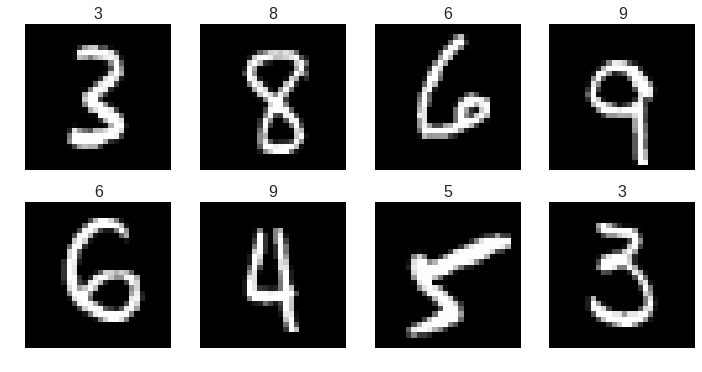

In [0]:
plots(x_imgs[:8], titles=preds[:8])

In [0]:
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dims[0])
def softmax(x): return torch.exp(x)/(torch.exp(x).sum(dim=1)[:,None])
'''
Our PyTorch class needs two things: constructor (says what the parameters are) 
and a forward method (how to calculate a prediction using those parameters) 
The method forward describes how the neural net converts inputs to outputs.

In PyTorch, the optimizer knows to try to optimize any attribute of type Parameter.
'''
class LogReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1_w = get_weights(28 * 28, 10)#layer 1 weights
    self.l1_b = get_weights(10)# layer 1 bias
#Just as Numpy has np.matmul for matrix multiplication 
#(in Python 3, this is equivalent to the @ operator), PyTorch has torch.matmul.
  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = (x @ self.l1_w) + self.l1_b #linear layer
    #x = torch.matmul(x, self.l1_w) + self.l1_b
    x = torch.log(softmax(x))
    return x

In [0]:
net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

In [0]:
fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.29819    0.28337    0.9204    



[array([0.28337]), 0.9204]

In [0]:
dl = iter(md.trn_dl)

In [0]:
xmb,ymb = next(dl)

In [0]:
vxmb = Variable(xmb.cuda())
vxmb

Variable containing:
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

In [0]:
preds = net2(vxmb).exp(); preds[:3]

Variable containing:

Columns 0 to 5 
 2.2693e-04  1.6004e-06  3.4954e-04  3.2937e-02  3.9271e-03  2.8294e-02
 8.9670e-05  1.2322e-01  8.0352e-01  5.2240e-03  4.3301e-03  4.2741e-04
 1.6113e-06  4.2621e-07  4.4899e-07  3.9338e-05  4.0779e-07  5.7801e-06

Columns 6 to 9 
 2.0717e-05  9.3154e-01  9.9891e-05  2.5984e-03
 6.0402e-02  7.7479e-04  1.8603e-03  1.4801e-04
 2.3916e-09  9.9988e-01  2.1435e-05  5.4364e-05
[torch.cuda.FloatTensor of size 3x10 (GPU 0)]

In [0]:
preds = preds.data.max(1)[1]; preds

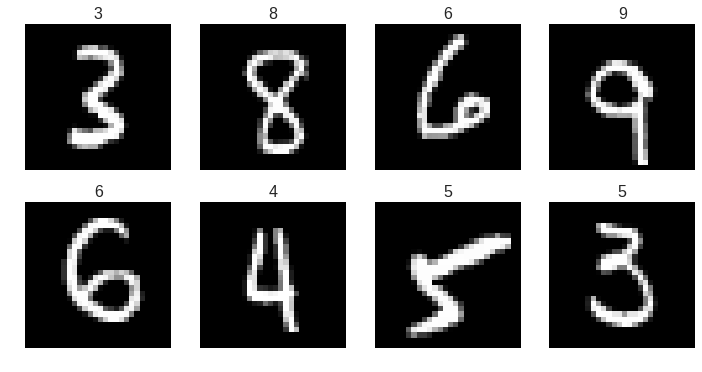

In [0]:
preds = predict(net2, md.val_dl).argmax(1)
plots(x_imgs[:8], titles=preds[:8])

In [0]:
np.mean(preds == y_valid)

0.9204

In [0]:
'''
The term broadcasting describes how numpy treats arrays with 
different shapes during arithmetic operations. Subject to certain 
constraints, the smaller array is “broadcast” across the larger 
array so that they have compatible shapes. Broadcasting provides a 
means of vectorizing array operations so that looping occurs in C
instead of Python. It does this without making needless copies of 
data and usually leads to efficient algorithm implementations.
'''

In [0]:
m = np.array([[1, 2, 3], [4,5,6], [7,8,9]]); m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
2*m

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [0]:
c = np.array([10,20,30]); c

array([10, 20, 30])

In [0]:
m + c
#We can also broadcast a vector to a matrix

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [0]:
np.broadcast_to(c[:, None], m.shape)

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [0]:
#The numpy expand_dims method lets us convert the 1-dimensional array c into a 
#2-dimensional array (although one of those dimensions has value 1).
np.broadcast_to(np.expand_dims(c,0), (3,3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [0]:
c.shape

(3,)

In [0]:
np.expand_dims(c, 0).shape

(1, 3)

In [0]:
c[None]

array([[10, 20, 30]])

In [0]:
c[:,None]

array([[10],
       [20],
       [30]])

In [0]:
xg,yg = np.ogrid[0:5, 0:5]; xg,yg

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [0]:
xg+yg

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [0]:
m @ c  # np.matmul(m, c)

array([140, 320, 500])

In [0]:
'''
From a machine learning perspective, matrix multiplication is a way of 
creating features by saying how much we want to weight each input column. 
Different features are different weighted averages of the input columns.
'''

In [0]:
'''
Above, we are using the fastai method fit to train our model. 
Now we will try writing the training loop ourselves.

Review question: What does it mean to train a model?

We will use the LogReg class we created, as well as the same loss function, 
learning rate, and optimizer as before:
'''
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-3
optimizer=optim.Adam(net2.parameters(), lr=learning_rate)

In [0]:
'''
md is the ImageClassifierData object we created above. We want an iterable 
version of our training data (question: what does it mean for something to be iterable?):
'''
dl = iter(md.trn_dl) # Data loader
#First, we will do a forward pass, which means computing the predicted y by passing x to the model.

xt, yt = next(dl)
y_pred = net2(Variable(xt).cuda())

In [0]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

Variable containing:
 2.3087
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [0]:
'''
We may also be interested in the accuracy. We don't expect our first predictions 
to be very good, because the weights of our network were initialized to random 
values. Our goal is to see the loss decrease (and the accuracy increase) as we 
train the network:

Now we will use the optimizer to calculate which direction to step in. That is, how should we update our weights to try to decrease the loss?

Pytorch has an automatic differentiation package (autograd) that takes derivatives 
for us, so we don't have to calculate the derivative ourselves! We just call 
.backward() on our loss to 
calculate the direction of steepest descent (the direction to lower the loss the most).
'''

# Before the backward pass, use the optimizer object to zero all of the
# gradients for the variables it will update (which are the learnable weights
# of the model)
optimizer.zero_grad()

# Backward pass: compute gradient of the loss with respect to model parameters
l.backward()

# Calling the step function on an Optimizer makes an update to its parameters
optimizer.step()


In [0]:
xt, yt = next(dl)
y_pred = net2(Variable(xt).cuda())

In [0]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

Variable containing:
 2.2306
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [0]:
'''
Note that we are using stochastic gradient descent, so the loss is not guaranteed 
to be strictly better each time. The stochasticity comes from the fact that we are 
using mini-batches; we are just using 64 
images to calculate our prediction and update the weights, not the whole dataset.
'''
np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))

0.28125

In [0]:
#Training loop

#If we run several iterations in a loop, we should see the loss decrease and 
#the accuracy increase with time.
for t in range(100):
    xt, yt = next(dl)
    y_pred = net2(Variable(xt).cuda())
    l = loss(y_pred, Variable(yt).cuda())
    
    if t % 10 == 0:
        accuracy = np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))
        print("loss: ", l.data[0], "\t accuracy: ", accuracy)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    


loss:  0.48675015568733215 	 accuracy:  0.890625
loss:  0.517317533493042 	 accuracy:  0.8125
loss:  0.35944971442222595 	 accuracy:  0.890625
loss:  0.44264039397239685 	 accuracy:  0.859375
loss:  0.6170780062675476 	 accuracy:  0.8125
loss:  0.3230590522289276 	 accuracy:  0.921875
loss:  0.39464184641838074 	 accuracy:  0.875
loss:  0.2987366318702698 	 accuracy:  0.90625
loss:  0.5802769064903259 	 accuracy:  0.90625
loss:  0.41924986243247986 	 accuracy:  0.859375


In [0]:
def score(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y))/len(y_pred)

In [0]:
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-2
optimizer=optim.SGD(net2.parameters(), lr=learning_rate)

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        # Forward pass: compute predicted y and loss by passing x to the model.
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        losses.append(l)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    
    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))

TypeError: ignored

In [0]:
net2 = LogReg().cuda()
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.l1_w,net2.l1_b

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()
        w.data -= w.grad.data * lr
        b.data -= b.grad.data * lr
        
        w.grad.data.zero_()
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))

TypeError: ignored